In [1]:
import numpy as np
import h5py
import tensorflow 
from tensorflow.keras.layers import Dropout, Conv2D, Dense, Flatten, MaxPooling2D, GlobalAveragePooling2D 
from tensorflow.keras.applications import DenseNet121
#from densenet121 import DenseNet 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
#import matplotlib.pyplot as plt
#import pandas as pd
from sklearn.metrics import accuracy_score
import scipy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [2]:
data_dir = 'FER+CK/train/'
val_dir = 'FER+CK/val/'

In [3]:
epochs = 300
batch_size = 8
target_size = (224,224)

In [4]:
datagen_train = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        shear_range=.2,
                        horizontal_flip=True)

train_generator = datagen_train.flow_from_directory(data_dir,
                                                    target_size=target_size,
                                                    batch_size= batch_size,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    shuffle=True)

datagen_val = ImageDataGenerator(featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        shear_range=.2,
                        horizontal_flip=True)

val_generator = datagen_val.flow_from_directory(val_dir,
                                                target_size=target_size,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                color_mode='rgb',
                                                shuffle=False) 

Found 29430 images belonging to 7 classes.
Found 6723 images belonging to 7 classes.


In [5]:
densenet = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

In [6]:
def build_model():
    model = Sequential()
    model.add(densenet)
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.5))
    model.add(Dense(7, activation='softmax'))
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.0001),
        metrics=['accuracy']
    )
    
    return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 7, 7, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 7175      
Total params: 7,044,679
Trainable params: 6,961,031
Non-trainable params: 83,648
_________________________________________________________________


In [7]:
my_callbacks = [
                EarlyStopping(monitor='val_accuracy', min_delta=1e-5, patience=20, mode='auto', verbose=1),
                ModelCheckpoint(filepath='224keras_ferck_densenet32.h5', monitor='accuracy', save_best_only=True, save_weights_only=False, mode='auto', verbose=1)
]

In [8]:
history = model.fit(train_generator,
                    epochs=epochs, steps_per_epoch=len(train_generator), # How many mini_batchs we have inside each epoch.
                    validation_data=val_generator,
                    callbacks=my_callbacks,
                    verbose=1)

Epoch 1/300
3679/3679 [==============================] - 1079s 285ms/step - loss: 1.4452 - accuracy: 0.4733 - val_loss: 1.1210 - val_accuracy: 0.5712

Epoch 00001: accuracy improved from -inf to 0.47326, saving model to 224keras_ferck_densenet32.h5
Epoch 2/300
3679/3679 [==============================] - 919s 250ms/step - loss: 1.1424 - accuracy: 0.5765 - val_loss: 1.1052 - val_accuracy: 0.5808

Epoch 00002: accuracy improved from 0.47326 to 0.57652, saving model to 224keras_ferck_densenet32.h5
Epoch 3/300
3679/3679 [==============================] - 924s 251ms/step - loss: 1.0415 - accuracy: 0.6174 - val_loss: 0.9894 - val_accuracy: 0.6258

Epoch 00003: accuracy improved from 0.57652 to 0.61743, saving model to 224keras_ferck_densenet32.h5
Epoch 4/300
3679/3679 [==============================] - 851s 231ms/step - loss: 0.9644 - accuracy: 0.6505 - val_loss: 0.9304 - val_accuracy: 0.6568

Epoch 00004: accuracy improved from 0.61743 to 0.65049, saving model to 224keras_ferck_densenet32.h

3679/3679 [==============================] - 701s 191ms/step - loss: 0.2292 - accuracy: 0.9185 - val_loss: 0.6865 - val_accuracy: 0.8191

Epoch 00033: accuracy improved from 0.91312 to 0.91845, saving model to 224keras_ferck_densenet32.h5
Epoch 34/300
3679/3679 [==============================] - 698s 190ms/step - loss: 0.2225 - accuracy: 0.9219 - val_loss: 0.7480 - val_accuracy: 0.8048

Epoch 00034: accuracy improved from 0.91845 to 0.92188, saving model to 224keras_ferck_densenet32.h5
Epoch 35/300
3679/3679 [==============================] - 808s 220ms/step - loss: 0.2151 - accuracy: 0.9235 - val_loss: 0.6896 - val_accuracy: 0.8273

Epoch 00035: accuracy improved from 0.92188 to 0.92351, saving model to 224keras_ferck_densenet32.h5
Epoch 36/300
3679/3679 [==============================] - 909s 247ms/step - loss: 0.2089 - accuracy: 0.9258 - val_loss: 0.7149 - val_accuracy: 0.8167

Epoch 00036: accuracy improved from 0.92351 to 0.92579, saving model to 224keras_ferck_densenet32.h5
Epoch

Epoch 68/300
3679/3679 [==============================] - 681s 185ms/step - loss: 0.1123 - accuracy: 0.9611 - val_loss: 0.7756 - val_accuracy: 0.8350

Epoch 00068: accuracy improved from 0.96103 to 0.96109, saving model to 224keras_ferck_densenet32.h5
Epoch 69/300
3679/3679 [==============================] - 694s 189ms/step - loss: 0.1109 - accuracy: 0.9613 - val_loss: 0.7055 - val_accuracy: 0.8526

Epoch 00069: accuracy improved from 0.96109 to 0.96126, saving model to 224keras_ferck_densenet32.h5
Epoch 70/300
3679/3679 [==============================] - 689s 187ms/step - loss: 0.1100 - accuracy: 0.9627 - val_loss: 0.8111 - val_accuracy: 0.8371

Epoch 00070: accuracy improved from 0.96126 to 0.96273, saving model to 224keras_ferck_densenet32.h5
Epoch 71/300
3679/3679 [==============================] - 685s 186ms/step - loss: 0.1113 - accuracy: 0.9621 - val_loss: 0.8358 - val_accuracy: 0.8344

Epoch 00071: accuracy did not improve from 0.96273
Epoch 72/300
3679/3679 [==================

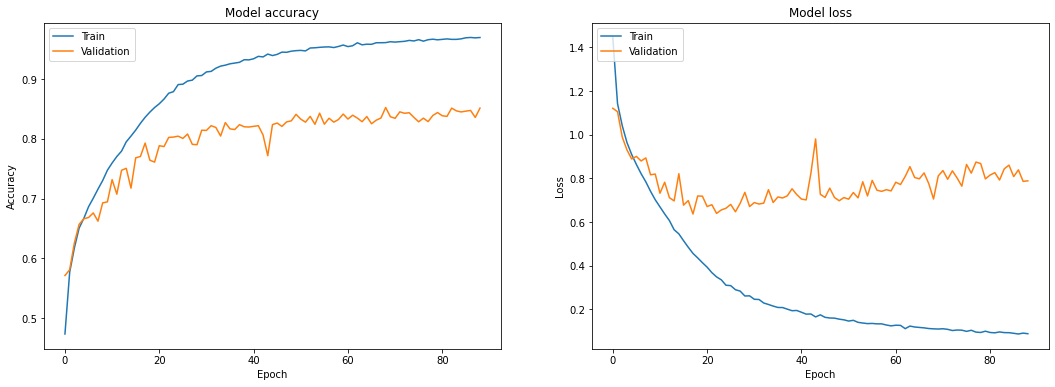

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(18, 6))

# Plot training & validation accuracy values

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
model_json = model.to_json()
with open("224keras_ferck_densenet32.json", "w") as json_file:
    json_file.write(model_json)

In [11]:
predictions = model.predict(val_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = val_generator.classes
class_names = val_generator.class_indices.keys()

print("Model Accuracy on test set: {:.4f}".format(accuracy_score(y_test, y_pred)))

Model Accuracy on test set: 0.8517


In [12]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       990
           1       0.87      0.86      0.86       162
           2       0.86      0.84      0.85      1025
           3       0.95      0.95      0.95      1796
           4       0.88      0.80      0.84      1734
           5       0.80      0.88      0.84       414
           6       0.66      0.64      0.65       602

    accuracy                           0.85      6723
   macro avg       0.83      0.84      0.83      6723
weighted avg       0.85      0.85      0.85      6723



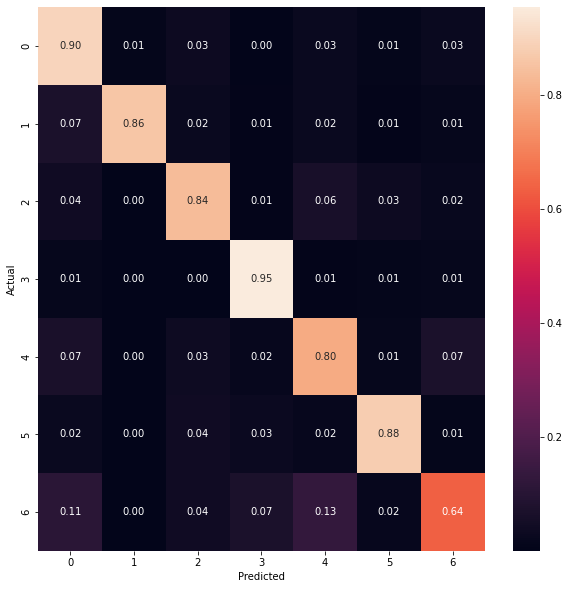

In [13]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [18]:
test_dir = 'FER_test/'

datagen_test = ImageDataGenerator(featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        shear_range=.2,
                        horizontal_flip=True)

test_generator = datagen_test.flow_from_directory(test_dir,
                                                target_size=(224,224),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                color_mode='rgb',
                                                shuffle=False) 

Found 106 images belonging to 7 classes.


In [19]:
scores = model.evaluate(test_generator, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores[1]*100))
print("Loss : ",scores[0])

14/14 [==============================] - 4s 269ms/step - loss: 0.7580 - accuracy: 0.8302

Model Accuracy: 83.02%
Loss :  0.7580212354660034


In [20]:
predictions = model.predict(test_generator)
Y_pred = [np.argmax(probas) for probas in predictions]
Y_test = test_generator.classes
class_names = test_generator.class_indices.keys()

print("Model Predict Accuracy on test set: {:.4f}".format(accuracy_score(Y_test, Y_pred)))

Model Predict Accuracy on test set: 0.8491


In [21]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       1.00      0.87      0.93        15
           2       0.79      0.73      0.76        15
           3       0.93      0.93      0.93        15
           4       0.75      0.75      0.75        16
           5       0.88      0.93      0.90        15
           6       0.80      0.80      0.80        15

    accuracy                           0.85       106
   macro avg       0.85      0.85      0.85       106
weighted avg       0.85      0.85      0.85       106



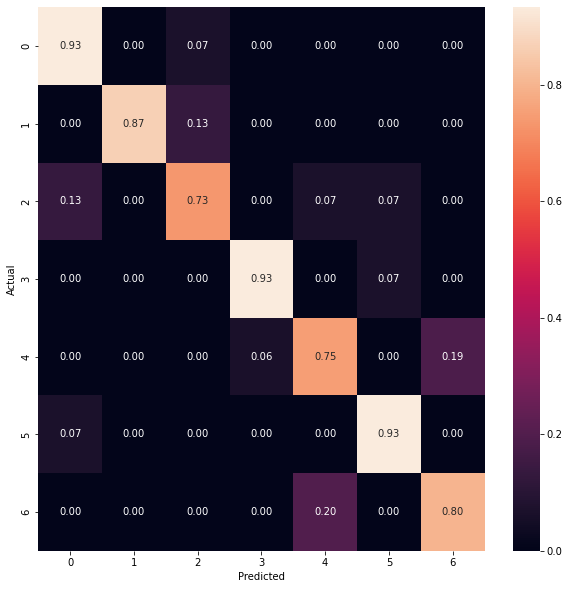

In [22]:
cm = confusion_matrix(Y_test, Y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)